# OpenFOAM 1D Heat Conduction

In [15]:
import os, glob
import pandas as pd
import pysindy as ps
import matplotlib.pyplot as plt

import numpy as np
import sklearn as skl

from pydmd import DMD
from math import floor

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from numpy import reshape

In [16]:
path = '/home/patrick/Documents/University/2021/MRN 412/Experimental data/1D OpenFOAM heat condution/Results1'
all_files = glob.glob(os.path.join(path, '1d_conduction_*.csv'))

df_from_each_file = (pd.read_csv(f, sep=',',  usecols=['Time','T']) for f in all_files)
df_merged = pd.concat(df_from_each_file)
data = df_merged.pivot(columns='Time', values='T')

In [17]:
data

Time,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,1195.5,1196.0,1196.5,1197.0,1197.5,1198.0,1198.5,1199.0,1199.5,1200.0
0,273.0,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,...,273.60,273.60,273.60,273.60,273.60,273.60,273.60,273.60,273.60,273.60
1,273.0,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,...,274.80,274.80,274.80,274.80,274.80,274.80,274.80,274.80,274.80,274.80
2,273.0,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,...,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00
3,273.0,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,...,277.20,277.20,277.20,277.20,277.20,277.20,277.20,277.20,277.20,277.20
4,273.0,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,273.00,...,278.39,278.39,278.39,278.39,278.39,278.39,278.39,278.39,278.39,278.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,273.0,382.23,437.51,465.33,481.58,492.30,500.01,505.88,510.54,514.35,...,567.59,567.59,567.59,567.59,567.59,567.59,567.59,567.59,567.59,567.59
246,273.0,409.53,463.47,487.57,500.98,509.65,515.82,520.48,524.17,527.18,...,568.79,568.79,568.79,568.79,568.79,568.79,568.79,568.79,568.79,568.79
247,273.0,443.67,492.13,511.01,521.05,527.43,531.93,535.32,537.99,540.16,...,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00
248,273.0,486.33,523.21,535.40,541.62,545.53,548.27,550.32,551.94,553.25,...,571.20,571.20,571.20,571.20,571.20,571.20,571.20,571.20,571.20,571.20


In [18]:
xs, ts = np.meshgrid(data.axes[0], data.axes[1])
xs= xs.T
ts = ts.T

In [19]:
ts

array([[0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.1990e+03, 1.1995e+03,
        1.2000e+03],
       [0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.1990e+03, 1.1995e+03,
        1.2000e+03],
       [0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.1990e+03, 1.1995e+03,
        1.2000e+03],
       ...,
       [0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.1990e+03, 1.1995e+03,
        1.2000e+03],
       [0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.1990e+03, 1.1995e+03,
        1.2000e+03],
       [0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 1.1990e+03, 1.1995e+03,
        1.2000e+03]])

In [20]:
split = 0.3 # Portion of training data

start_t= 2.5
train_t = 359.5
test_t = 600

dt_data = 0.5 # Spacing between readings

t_test = [10, 20, 30]

In [21]:
X_train = data.loc[:, start_t:train_t]

In [22]:
X_train_arr = X_train.to_numpy()
data_arr = data.to_numpy()

In [23]:
x = np.arange(0, data.shape[0], 1)
t = np.arange(0, data.shape[1]+0.1, dt_data)

xgrid, tgrid = np.meshgrid(x, t)

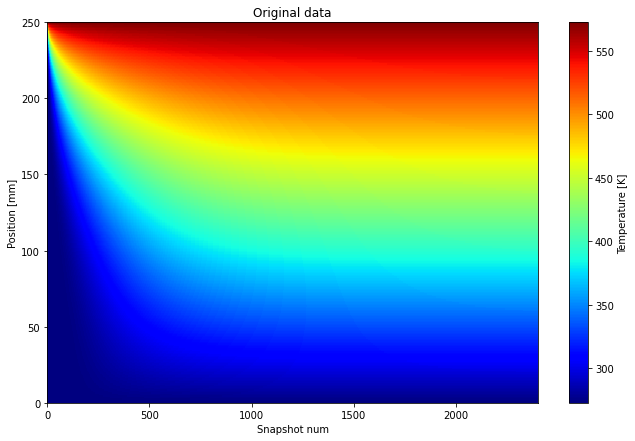

In [24]:
fig = plt.figure(figsize=(11,7))
plt.pcolormesh(data_arr, cmap="jet")
plt.colorbar(label="Temperature [K]")
plt.title("Original data")
plt.xlabel("Snapshot num")
plt.ylabel("Position [mm]")
plt.show()

In [25]:
dmd = DMD(svd_rank=0, tlsq_rank=0, exact=False, opt=False, rescale_mode=None, forward_backward=False, sorted_eigs=False)
dmd.fit(X_train_arr)

'''
dmd.dmd_time['t0'] = start_t
dmd.dmd_time['tend'] = train_t 
dmd.dmd_time['dt'] *= dt
'''

/home/patrick/.python-virtual-enivronments/mrn/lib/python3.9/site-packages/pydmd/dmdbase.py:348: UserWarning: Input data matrix X has condition number 4983091.307367836. Consider preprocessing data, passing in augmented data matrix, or regularization methods.
  warnings.warn(


"\ndmd.dmd_time['t0'] = start_t\ndmd.dmd_time['tend'] = train_t \ndmd.dmd_time['dt'] *= dt\n"

Eigenvalue 0.44251201773121523: distance from unit circle 0.5574879822687848
Eigenvalue 0.5836118712816342: distance from unit circle 0.41638812871836584
Eigenvalue 0.7286761448849398: distance from unit circle 0.2713238551150602
Eigenvalue 0.8166871141678743: distance from unit circle 0.18331288583212568
Eigenvalue 0.8860237567117683: distance from unit circle 0.11397624328823175
Eigenvalue 0.9226293046206255: distance from unit circle 0.07737069537937447
Eigenvalue 0.9519650625420065: distance from unit circle 0.048034937457993476
Eigenvalue 1.0000002586964527: distance from unit circle 2.586964527040436e-07
Eigenvalue 0.9968475331788601: distance from unit circle 0.0031524668211398987
Eigenvalue 0.9875375814633568: distance from unit circle 0.012462418536643205
Eigenvalue 0.9721557682137499: distance from unit circle 0.027844231786250062


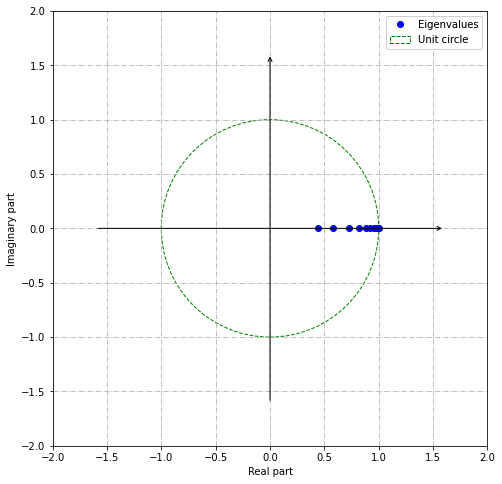

In [26]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(np.sqrt(eig.imag**2+eig.real**2) - 1)))
dmd.plot_eigs(show_unit_circle=True, show_axes=True)

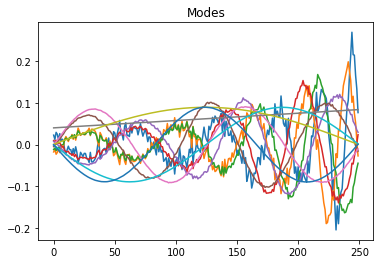

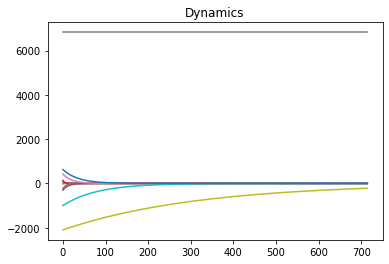

In [27]:
for mode in dmd.modes.T:
    plt.plot(range(data.shape[0]), mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(dmd.dmd_timesteps, dynamic.real)
    plt.title('Dynamics')
plt.show()

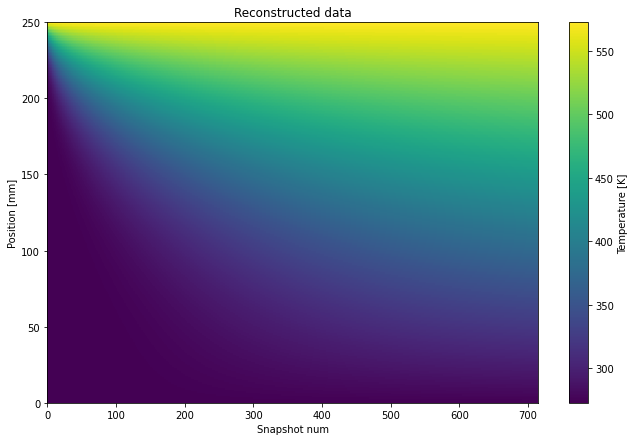

In [28]:
fig = plt.figure(figsize=(11,7))
plt.pcolor(dmd.reconstructed_data.real)
plt.colorbar(label="Temperature [K]")
plt.title("Reconstructed data")
plt.xlabel("Snapshot num")
plt.ylabel("Position [mm]")
plt.show()

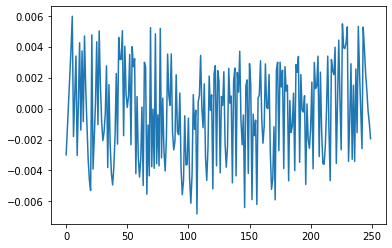

In [29]:
plt.plot((dmd.reconstructed_data.real[:, -1] - X_train_arr[:,-1]))


The maximum temperature error is 0.009339483843746166 C


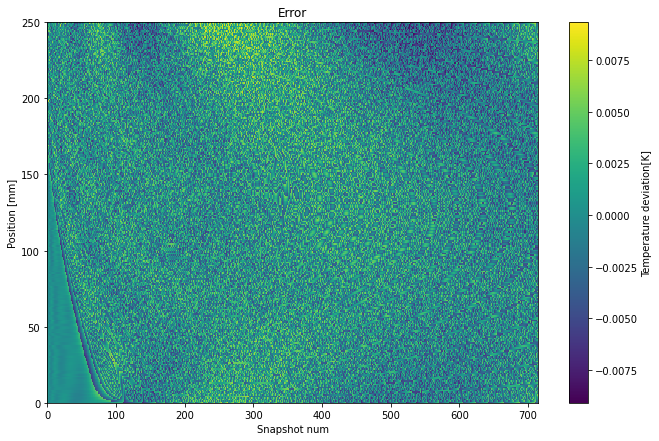

In [30]:
error = (dmd.reconstructed_data.real-dmd.snapshots)
print("The maximum temperature error is {} C".format(np.abs(error).max()))
fig = plt.figure(figsize=(11,7))
plt.pcolor(error)
plt.title("Error")
plt.colorbar(label="Temperature deviation[K]")
plt.xlabel("Snapshot num")
plt.ylabel("Position [mm]")
plt.show()

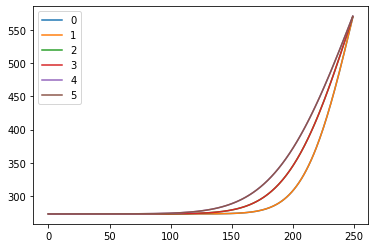

In [31]:
i=0
for ts in t_test:
    plt.plot(dmd.snapshots[:, int(ts//dt_data)], label="{}".format(i))
    i+=1
    plt.plot(dmd.reconstructed_data[:, int(ts//dt_data)], label="{}".format(i))
    i+=1
    plt.legend()
plt.show()

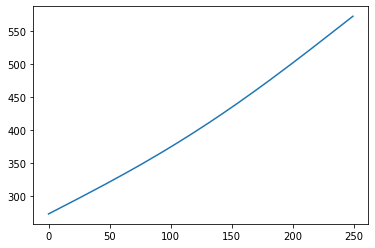

In [17]:
plt.plot(data.loc[:, 359.5])

In [18]:
print(f"Shape before manipulation: {dmd.reconstructed_data.shape}.")
print(f"Time data before manipulation: {dmd.dmd_time}.")
dmd.dmd_time['t0'] = start_t
dmd.dmd_time['dt'] = 0.5
dmd.dmd_time['tend'] = train_t/dt_data
print("Shape after manipulation: {}".format(dmd.reconstructed_data.shape))
print(f"Time data after manipulation: {dmd.dmd_time}.")

Shape before manipulation: (250, 715).
Time data before manipulation: {'t0': 0, 'tend': 714, 'dt': 1}.
Shape after manipulation: (250, 1434)
Time data after manipulation: {'t0': 2.5, 'tend': 719.0, 'dt': 0.5}.


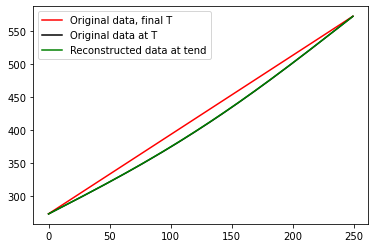

In [19]:
plt.plot(data.iloc[:,-1], 'r-', label='Original data, final T')
plt.plot(data.loc[:, train_t], 'k-', label='Original data at T')
plt.plot(dmd.reconstructed_data.real[:,-1], 'g-', label='Reconstructed data at tend')
plt.legend()

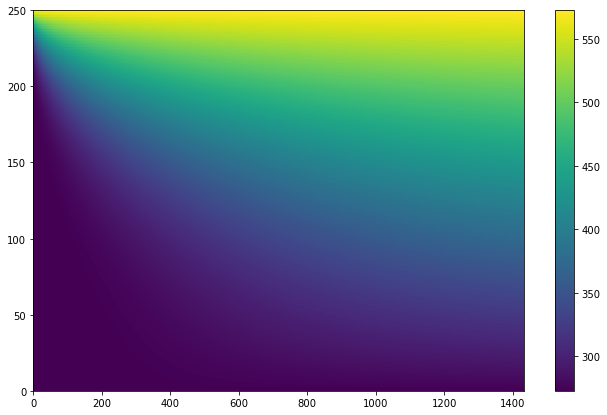

In [20]:
fig = plt.figure(figsize=(11,7))
plt.pcolor(dmd.reconstructed_data.real)
plt.colorbar()
plt.show()

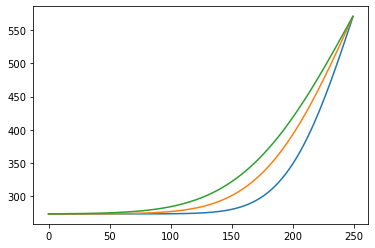

In [19]:
dt = 0.25
for ts in t_test:
    plt.plot(dmd.reconstructed_data[:, int(ts//dt)])

In [ ]:
model.print()